# Figure 3

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="whitegrid")

## Beautifying Figure 3

In [2]:
XHMM =  [0.059, 0.008, 0.034, 0.008, 0.021, 0.015, 0.014, 0.012, 0.021]
CONIFER = [0.000, 1.000, 0.500, 0.000, 0.076, 0.038, 0.000, 0.141, 0.071]
CODEX2 = [0.023, 0.003, 0.013, 0.238, 0.138, 0.188, 0.042, 0.006, 0.024]
DECoNT_XHMM = [0.051, 0.010, 0.031, 0.006, 0.019, 0.013, 0.011, 0.013, 0.018]
DECoNT_CONIFER = [0.000, 1.000, 0.500, 0.000, 0.061, 0.031, 0.000, 0.115, 0.058]
DECoNT_CODEX2 = [0.022, 0.004, 0.013, 0.070, 0.087, 0.079, 0.033, 0.008, 0.022]
ECOLE = [0.181, 0.070, 0.126, 0.050, 0.137, 0.094, 0.078, 0.093, 0.108]
ECOLE_EXPERT = [0.584, 0.789, 0.687, 0.444, 0.547, 0.496, 0.504, 0.646, 0.576]

performance = {"XHMM":XHMM,"CONIFER":CONIFER,"CODEX2":CODEX2,"ECOLE":ECOLE,"ECOLE_EXPERT":ECOLE_EXPERT}
decont_performance = {"DECoNT_XHMM":DECoNT_XHMM,"DECoNT_CONIFER":DECoNT_CONIFER,"DECoNT_CODEX2":DECoNT_CODEX2,"ECOLE":ECOLE,"ECOLE_EXPERT":ECOLE_EXPERT}


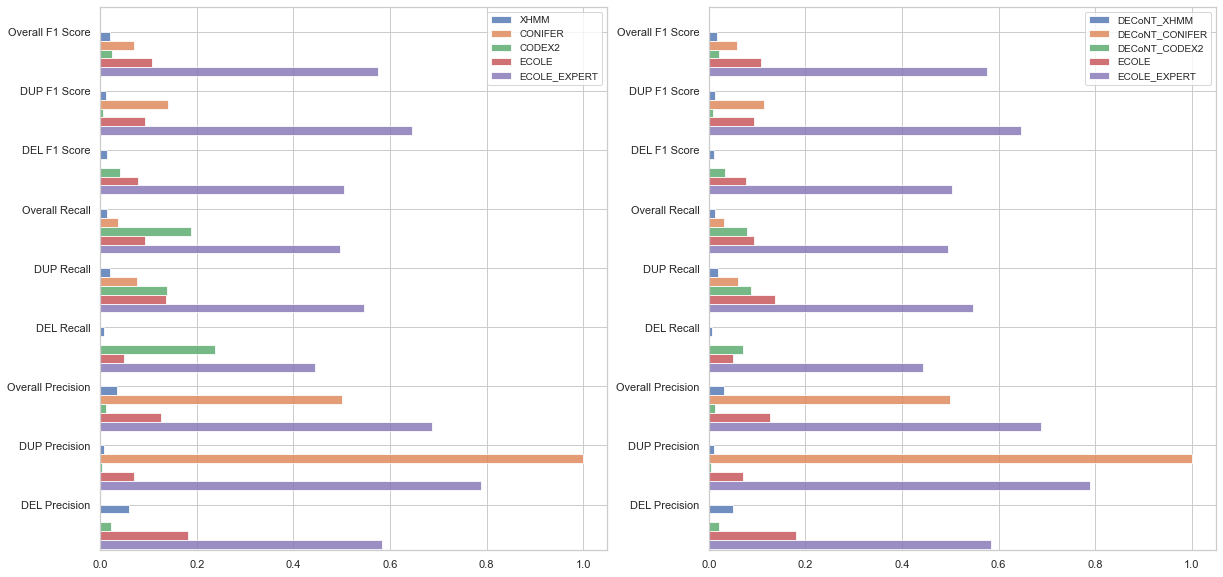

In [78]:
performanceTypes = ['DEL Precision','DUP Precision','Overall Precision','DEL Recall','DUP Recall','Overall Recall','DEL F1 Score','DUP F1 Score','Overall F1 Score']



ind = np.arange(len(performanceTypes))
width=0.15 

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1 = plt.subplot(1, 2, 1)
for i,caller in enumerate(performance.keys()):
    ax1.barh(ind-i*width, performance[caller], width, align='center', alpha=0.8, label=caller) #a horizontal bar chart (use .bar instead of .barh for vertical)
ax1.set(yticks=ind + width/2, yticklabels=performanceTypes, ylim=[2*width - 1, len(performanceTypes)-0.5])
ax1.legend(loc="upper right",fontsize=10)

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
for i,caller in enumerate(decont_performance.keys()):
    ax2.barh(ind-i*width, decont_performance[caller], width, align='center', alpha=0.8, label=caller) #a horizontal bar chart (use .bar instead of .barh for vertical)
ax2.set(yticks=ind + width/2, yticklabels=performanceTypes, ylim=[2*width - 1, len(performanceTypes)-0.5 ])
ax2.legend(loc="upper right",fontsize=10)

#plt.xlabel('')
plt.show()

## CNV Distributions

In [3]:
cur_dirname = os.getcwd()
test1 = np.load(cur_dirname+'/Chaisson_et_al_test_data/HG00513_labeled_data.npy',allow_pickle=True)
test2 = np.load(cur_dirname+'/Chaisson_et_al_test_data/HG00732_labeled_data.npy',allow_pickle=True)
test3 = np.load(cur_dirname+'/Chaisson_et_al_test_data/HG00733_labeled_data.npy',allow_pickle=True)
test4 = np.load(cur_dirname+'/Chaisson_et_al_test_data/NA19240_labeled_data.npy',allow_pickle=True)
HG00513_labeled_data = test1[:,5]
HG00732_labeled_data = test2[:,5]
HG00733_labeled_data = test3[:,5]
NA19240_labeled_data = test4[:,5]

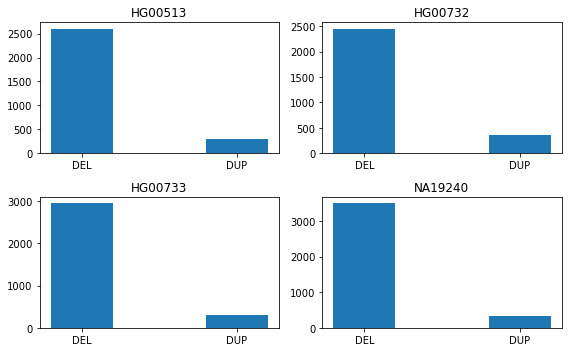

In [39]:
data = {'C':20, 'C++':15, 'Java':30,
        'Python':35}
HG00513_cnv = {"DEL": np.sum(HG00513_labeled_data=="<DEL>"),"DUP": np.sum(HG00513_labeled_data=="<DUP>")}
HG00732_cnv = {"DEL": np.sum(HG00732_labeled_data=="<DEL>"),"DUP": np.sum(HG00732_labeled_data=="<DUP>")}
HG00733_cnv = {"DEL": np.sum(HG00733_labeled_data=="<DEL>"),"DUP": np.sum(HG00733_labeled_data=="<DUP>")}
NA19240_cnv = {"DEL": np.sum(NA19240_labeled_data=="<DEL>"),"DUP": np.sum(NA19240_labeled_data=="<DUP>")}
  
fig, ax = plt.subplots(2,2, figsize=(8,5))
 
# creating the bar plot
ax[0,0].bar(HG00513_cnv.keys(), HG00513_cnv.values(),width = 0.4)
ax[0,0].set_title("HG00513")
ax[0,1].bar(HG00732_cnv.keys(), HG00732_cnv.values(),width = 0.4)
ax[0,1].set_title("HG00732")
ax[1,0].bar(HG00733_cnv.keys(), HG00733_cnv.values(),width = 0.4)
ax[1,0].set_title("HG00733")
ax[1,1].bar(NA19240_cnv.keys(), NA19240_cnv.values(),width = 0.4)
ax[1,1].set_title("NA19240")
fig.tight_layout()
plt.show()